The relation between the number of fast food restaurants and the overweight or obesity rate
===============

## Final Assignment  - Applied Economics 1

#### Sebastian Porras Garulo (853030) and Laura Farny (665536), January, 2017.


This notebook shows how a simple python model can be calibrated to analyze life expectancy at birth in the Netherlands. We used data from The World Bank’s website in order to compare the life expectancy of an average Dutch individual with the results the Weibull survival function estimates. This function is explained in David L. Wilson’s paper ‘The analysis of survival (mortality) data: Fitting Gompertz, Weibull and logistic functions’ (1994).

## Introduction

### Question: 
   Is there a relation between the increasing number of fast food restaurants and the increase in the overweight rate (including obesity) of the population? In other words, we describe whether people suffer from obesity because more fast food restaurants open every year which leads to more frequent visits of these kinds of restaurants. Our hypothesis is that there is a positive relationship between these variables, with a marginal decreasing effect.


#### Motivation:
There is clear evidence that the fast food industry is growing more and more. Over the last decades companies like McDonald’s, which started in the United States, opened an increasing number of restaurants all over the world. That gives many opportunities to consume fast food and people are more tempted to enter a McDonald’s restaurant when they see it over and over again in their environment. That might lead to the reverse of the medal because there is no doubt that slowly but surely the worlds’ population is getting overweight. A lot of people underestimate the huge amount of calories they are about to eat when ordering a regular meal at a McDonald’s restaurant including a burger, French fries and a soft drink because it already contains more than one half of the calories that an average person should consume per day. This issue and obesity in particular is a severe health problem because it raises the risks for other illnesses like diabetes, certain cancers and heart disease as well as premature death. 

An important factor within the fast food industry that affects obesity is the size of the portions that are served when you order a meal. [Young and Nestle (2007)](http://portionteller.com/pdf/JPHPJune07.pdf) explained that portions nowadays are larger than in the time the restaurant first introduced a specific meal. That finding might support the fact that people consume more calories in fast food restaurants these days than in the 1980s. Furthermore the portion sizes in the United Stated are larger than in Europe. However, the portion itself increased in Europe as well over time. The fact that portions may be too big is also illustrated in the documentary film “Super Size Me” which shows that consuming fast food every day, or rather the supersize menu items of McDonald’s, has drastic effects on an individual’s physical and psychological well-being, especially the weight gain is an important factor. That is why health authorities are calling out to fast food companies to reduce the sizes of their menu items. Some countries have even forbidden restaurants to ask if the client prefers a bigger menu.

There is to mention that not only the fast food industry has an impact on peoples’ consumption behavior. In other words there are factors that push people in a specific direction whether they are going to eat fast food or healthier food. One of these important factors that have to be considered is the income of an individual. Since fast food is most of the time the cheapest option when it comes to deciding where to eat, low income individuals tend to consume more fast food because they cannot afford a healthier diet (every day) and thus they are more likely to become obese. Moreover, [Powell et al. (2006)](https://www.ncbi.nlm.nih.gov/pubmed/19548547) found out that setting a higher price for a fast food meal leads to an increase in probability of fruit and vegetable consumption. They also show that the price affects the BMI and the probability of overweight in that way that higher prices of fast food reduce the chance of weight gain. This is a clear income effect, where people substitute their choice for a healthier and relatively cheaper option when the price is higher.

[Musaiger (2011)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3175401/) discussed various factors, urbanization amongst others, which one can associate with obesity in countries of the Middle East. He found a higher appearance of obese people in urban areas than in rural areas. That is because of urbanization people are less physically active and have more access to fast food restaurants than the people do in rural areas. Other important reasons mentioned are frequent snacking, massive marketing promotion of high fat foods, high intake of sugar beverages and an increase in the incidence eating non-cooked meals at home. These facts are partly related with eating in fast food restaurants because these kind of restaurants are known for their high sugar beverages, big marketing campaigns, cheap greasy snacks and they are clearly the least expensive option when eating outside. 

On the contrary the article by [Befort et al. (2008)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3481194/) is noticeable because they show higher prevalence of obesity in rural areas of the United States than among urban residents by using their BMI. As a reason they mention that a significantly higher percentage of calories consumed by rural residents is from fat compared to the urban residents which is a determining factor causing obesity.

Finally, [Alhéritière et al. (2012)](http://onlinelibrary.wiley.com/doi/10.1111/joim.12126/full) published an analysis comparing the number of McDonald’s restaurants worldwide with the overweight rate. The findings were remarkable because they found a positive correlation for the 44 countries they chose. They used the population to create the restaurants per inhabitant ratio. The linear regression showed a strong correlation with the overweight population rate. However, they did not analyze the growth of these variables in a panel data, neither made use of control variables. The regression was linear so they assumed a positive relation with constant marginal effects that may not be the case. 

#### Method:
In order to implement our analysis we chose seven countries, including the United States which is best known for high obesity rates. That is, more than one third of the American population is obese and 69% of them are overweight (including obesity). We want to compare the number of McDonald’s restaurants in the years 2008 to 2014 with the overweight or obesity rate in each country respectively. To be able to get such a comparison we run four regressions with the control variables restaurants per inhabitant, GDP per capita and the urbanization level. 

#### Answer:
We see that the more McDonald’s restaurants open over time in our selected countries, the overweight or obesity rate increases as well. We find no significant effects that the GDP per capita and the urbanization level would influence the overweight or obesity rate of a population.


## Importing Libraries

In [114]:
from __future__ import division
from numpy import *
from operator import *
import matplotlib.pyplot as plt
from scipy import optimize, arange
from operator import add
#from openopt import GLP
from mpmath import findroot
from astropy.table import Table, Column
from pandas.stats.plm import * 
import pandas as pd
import statsmodels.formula.api as sm
#and import the data file:
data=pd.DataFrame.from_csv('/Users/Sebastian/Documents/Sebastian/Applied Economics/Final Assignment/data.csv')
data.head()

,Country,Overweight,McR,Pop,McR_Pop,urban,GDP,Year,ID,USA,...,Austria,Italy,y_one,y_two,y_three,y_four,y_five,y_six,y_seven,y_eight
1,USA,67.9,13918,304094000.0,2.230000e-07,80.44,1.460000e+13,2008,1,1,...,0,0,1,0,0,0,0,0,0,0
2,USA,67.8,13980,306771500.0,2.210000e-07,80.61,1.450000e+13,2009,1,1,...,0,0,0,1,0,0,0,0,0,0
3,USA,67.7,14027,309347100.0,2.190000e-07,80.77,1.490000e+13,2010,1,1,...,0,0,0,0,1,0,0,0,0,0
4,USA,68.0,14098,311721600.0,2.180000e-07,80.94,1.520000e+13,2011,1,1,...,0,0,0,0,0,1,0,0,0,0
5,USA,68.6,14157,314112100.0,2.180000e-07,81.11,1.540000e+13,2012,1,1,...,0,0,0,0,0,0,1,0,0,0


## Methodology and Data

In order to analyze the relationship between increasing overweight or obesity and the rising number of McDonald’s restaurants, we took a small sample of countries, including the Unites States, Germany, Spain, Austria, Italy, The Netherlands and Great Britain. The sample was specially represented by the USA, since McDonald’s was firstly founded there. We also compared some European countries since they have a big and increasing industry of fast food as well, where McDonald’s is one of the biggest competitors. The countries were also selected for their easy access to public information that was needed for the analysis.

To find out whether there is a relationship between the increasing number of McDonald’s restaurants and the increasing percentage of overweight or obese people in the European countries as well as in USA, we used the data from different sources. The information about McDonald’s restaurants is published on the holding company’s web [page](www.mcdonalds.com) and on the company’s local web pages ([Germany](www.mcdonalds.de), [Netherlands](www.mcdonalds.nl), [Italy](www.mcdonalds.it),[Austria](www.mcdonalds.at), [United Kindom](www.mcdonalds.co.uk) and [Spain](www.mcdonalds.es) Annual Reports) for the years 2008 to 2015. The data of overweight and obesity percentage of the population is published on the [World Health Organization’s (WHO)](http://who.int/), as well as in the [OECD](www.oecd.org) database and some local governmental web pages for the years 2008 to 2014.

The relation needs to be adjusted by the population size of each country, since a bigger population may easily imply a greater number of restaurants in that country. Therefore, the variable we used is restaurants per inhabitant. The number of inhabitants per country per year was taken from the OECD database.

As discussed earlier, the existence of overweight and obesity may be due to many reasons, not only because of the quantity of fast food people consume. Therefore, some other variables are taken into account, such as: level of urbanization of each country we considered in our analysis and the GDP per capita. The GDP per capita is calculated with the data available also at the OECD database, while the urbanization level was taken from a private online database, [Statista](http://www.statista.com).

Table 1 shows the summary of all the variables. The number of observations is not constant because there is no public information for some countries in specific years. To be more precise, the overweight and obese rate from 2008 and 2009 of the Netherlands is missing. Also, the number of McDonald’s restaurants is not published for the years 2008 and 2009 except for Germany and the USA. 

The Figure 1 shows how every country have had a positive trend in the overweight over time.

#### Table 1

In [115]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Overweight,47.0,6.081277e+01,4.765712e+00,5.090000e+01,NaN,NaN,NaN,6.960000e+01
Pop,49.0,8.393267e+07,9.699692e+07,8.321541e+06,NaN,NaN,NaN,3.188571e+08
McR_Pop,47.0,1.983085e-06,2.121142e-06,2.180000e-07,NaN,NaN,NaN,6.650000e-06
urban,49.0,7.682041e+01,7.256505e+00,6.584000e+01,NaN,NaN,NaN,8.991000e+01
GDP,49.0,2.457294e+12,5.275543e+12,7.310000e+10,NaN,NaN,NaN,1.620000e+13
Year,56.0,2.011500e+03,2.312024e+00,2.008000e+03,2009.75,2011.5,2013.25,2.015000e+03
ID,56.0,4.000000e+00,2.018100e+00,1.000000e+00,2.00,4.0,6.00,7.000000e+00
USA,56.0,1.428571e-01,3.530939e-01,0.000000e+00,0.00,0.0,0.00,1.000000e+00
UK,56.0,1.428571e-01,3.530939e-01,0.000000e+00,0.00,0.0,0.00,1.000000e+00
Spain,56.0,1.428571e-01,3.530939e-01,0.000000e+00,0.00,0.0,0.00,1.000000e+00


#### Figure 1

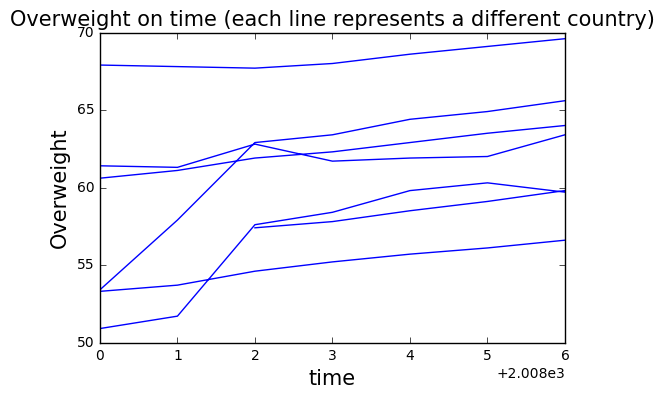

In [128]:
plt.plot(data.Year,data.Overweight)
plt.title("Overweight on time (each line represents a different country)",fontsize = 15)
plt.xlabel("time",fontsize = 15)
plt.ylabel("Overweight",fontsize = 15,rotation = 90)
plt.show()

The model chosen for the analysis of the panel data was a fixed effects model for the countries (the regression will be lineal controling with dummies for each country). The relation between the overweight and obese rate with the number of restaurants per inhabitant is not expected to be linear. The hypothesis of the paper is that there is a positive relationship. However, with new restaurants opening over time, the effect they have on the population will decline over time. With that in mind we expect a positive and marginal decreasing effect. We express this relationship with a logarithmic transformation to obtain a linear form of the Cobb-Douglas equation. 

Therefore the regression is as follows:

$$\LARGE Ln(Overweight)_{i,t} = C + \beta Ln(\frac{Mcdonalds_{i,t}}{Population_{i,t}}) + \gamma Ln(X_{i,t}) \\$$

where Overweight or Obese represent the percentage of people in country i in year t that have a BMI>25 which implies overweight or obesity. Also, C is equal to the constant, β and ϒ represent the coefficients of the natural logarithm of the McDonald’s restaurants per inhabitant and the control variable X respectively (GDP per capita and Urbanization level are used). 

Furthermore we added a trend variable to the model in order to control the effects of the growth of the overweight or obese rate that is not due to the independent variables. The regression without the trend is not shown, but it has a bigger absolute value for the coefficient β as expected. Moreover, we find a significance in the trend variable in all cases (P-value < 0.01).


## Results

Table 2 shows the results of the regression using both control variables (GDP per capita and urbanization level).

#### Table 2

In [129]:
result = sm.ols('log(Overweight) ~ log(McR_Pop) + log(GDP/Pop)+log(urban)+USA+UK+Spain+Netherlands+Germany+Italy+y_one+y_two+y_three+y_four+y_five+y_six+y_seven', data=data).fit()
print result.summary()
#Notice that Austria and year 2015 were left out, since one needs to be left out 

                            OLS Regression Results                            
Dep. Variable:        log(Overweight)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     717.7
Date:                Sun, 08 Jan 2017   Prob (F-statistic):           4.53e-35
Time:                        23:35:03   Log-Likelihood:                 190.63
No. Observations:                  47   AIC:                            -349.3
Df Residuals:                      31   BIC:                            -319.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         11.7311      0.999     11.

## .. 
 
We do not find evidence that the GDP per capita has a significant effect on the overweight or obese rate; neither does the urbanization level. However, the signs of both variables were as expected. GDP per capita could seem to have a negative effect, meaning that individuals with a higher income tend to consume less fast food. Similarly, a higher urbanization level would increase the rate of overweight or obesity, meaning that urban residents tend to consume more fast food than the rural population. 

Our main finding is the positive relation between the McDonald’s restaurants per inhabitant and the overweight or obesity rate. As expected in the hypothesis, the increase of this rate is partly due to an increase of fast food consumption, explained in this study as the rising number of restaurants. This coefficient is smaller than 1, so we also find a marginal decreasing effect as predicted. In this finding it is also important to highlight the high value of the constant which is also significant. This means that there are other variables not taken into account that explain as well the size of the overweight or obesity rate.

## Conclusion

By using the increasing number of McDonald’s restaurants per inhabitant as a variable explaining the increase of fast food consumption, we found a positive relation with the rates of the population that is overweight or obese in the United States, Germany, The Netherlands, Italy, Spain, Austria and the United Kingdom. We did not find evidence that the urbanization level and GDP per capita of each country can explain an increase in the overweight or obesity rate.

These results are partly in line with the literature that mentions causes for the overweight and obesity rates. There is a wide range of literature regarding a lot of other reasons that cause obesity that were not analyzed in this paper. However, they may have an important effect and would explain the high value of the constant in the regression.
Another important limitation is the small sample of years used in the analysis (2008-2014). The scarce public information that is needed to get more precise results may have an important effect on the underestimated significance of the control variables. It also may imply that the effect of the correlation we found is overestimated.
Since we concentrated on the relation of the number of McDonald’s restaurants and the overweight or obesity rate only until 2014, there is to mention that in 2015 for the first time since 1970 the McDonald’s company closed more restaurants than it opened in the United States. With that in mind there is a chance that our results might change when we implement the same analysis in 10 or 20 years from now.
